## Class : C550-T301 Data Mining (2241-1)
## Name : Rajib Samanta
### Assignment : Week 4

In the Week 4 Exercise, you will build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles. Download the auto-mpg.csv dataset from:
    https://www.kaggle.com/datasets/uciml/autompg-dataset?resource=download
    

1. Load the data as a Pandas data frame and ensure that it imported correctly.
2. Begin by prepping the data for modeling:
        * Remove the car name column.
        * The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
        * Create dummy variables for the origin column.
3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.
6. Train an ordinary linear regression on the training data.
7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.
8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [42]:
# Import Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor


In [43]:
# Read the automobiles dataset  file ('auto-mpg.csv') from local:
directory = '/Users/rajibsamanta/Documents/Rajib/College/Sem6_fall_2023/Week4' 
# Set the working directory
os.chdir(directory)
print(os.getcwd())
# 1. Load the data as a Pandas data frame and ensure that it imported correctly

file_name = "auto-mpg.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_name)
#df = pd.read_csv(file_name, delimiter='\t', quoting=3)

# Display few records.
df.head()

/Users/rajibsamanta/Documents/Rajib/College/Sem6_fall_2023/Week4


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [44]:
# 2. Begin by prepping the data for modeling:
##.    Remove the car name column.
##.    The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
##.    Create dummy variables for the origin column.

# --> Describe the dataframe to get the idea about data
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [45]:
# Get information about the DataFrame
data_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [46]:
# Try to convert the horsepower and find out which rows values are not numeric
# Use pd.to_numeric to attempt conversion, with errors='coerce'
non_numeric_rows = df[pd.to_numeric(df['horsepower'], errors='coerce').isna()]

# Display the rows with non-numeric values
print(non_numeric_rows)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  origin              car name  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  
374          82       1        amc concord dl  


#### The datafreame info and isnull function cloum 'horsepower' object type and there is no not null rows. Few rows does not have numeric values and there it has '?' character. We can remove them.

In [47]:
# Remove car name column
df.drop(columns=['car name'], inplace=True)
# Convert "horsepower" column to numeric, forcing errors to coerce non-numeric values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Replace NaN values (caused by non-numeric strings) with the mean of the column
mean_horsepower = df['horsepower'].mean()
df['horsepower'].fillna(mean_horsepower, inplace=True)

# Create dummy variables for the "origin" column
df = pd.get_dummies(df, columns=['origin'], prefix='origin')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


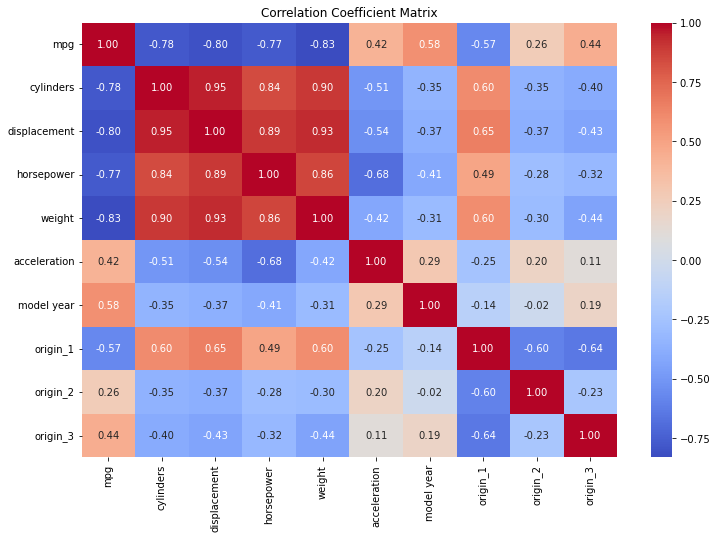

In [48]:
# 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
# Create a correlation coefficient matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot title
plt.title("Correlation Coefficient Matrix")

# Show the plot
plt.show()

#### From the above heatmap graph we can conclude that mpg has high negative correlation with cylinders(-0.78),displacement (-0.80),horsepower (-0.77), weight (-0.83) and medium positive correlation with model year(0.58)

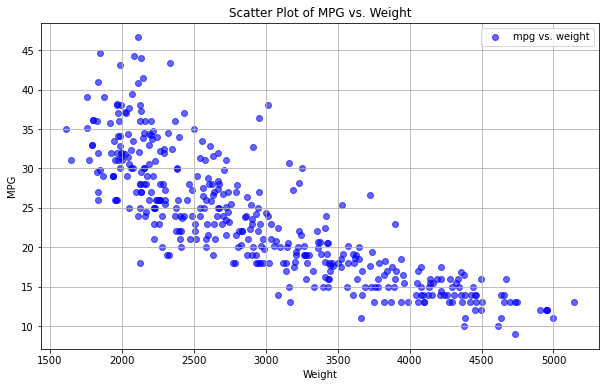

In [49]:
# 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
# Scatter plot of mpg versus weight
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['mpg'], alpha=0.6, color='b', label='mpg vs. weight')
plt.title('Scatter Plot of MPG vs. Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show()


#### The scatter plot shows a clear downward-sloping trend, where "mpg" tends to decrease as "weight" increases, it suggests a negative correlation between the two variables. 

In [50]:
# 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.
# 'X' contains the independent variables (features), excluding 'mpg'
# 'y' contains the target variable 'mpg'

# Extract the target variable and features
X = df.drop(columns=['mpg'])
y = df['mpg']

# Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the resulting datasets
print("Training data size (X_train, y_train):", X_train.shape, y_train.shape)
print("Test data size (X_test, y_test):", X_test.shape, y_test.shape)


Training data size (X_train, y_train): (318, 9) (318,)
Test data size (X_test, y_test): (80, 9) (80,)


In [51]:
# 6. Train an ordinary linear regression on the training data.
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [52]:
# 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

# Make predictions on the training data
y_train_pred = model.predict(X_train)
# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Calculate R-squared (R2) for both training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE) for both training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate Mean Absolute Error (MAE) for both training and test sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Training R2:", r2_train)
print("Test R2:", r2_test)
print("Training RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Training MAE:", mae_train)
print("Test MAE:", mae_test)

Training R2: 0.8188288951042786
Test R2: 0.8449006123776617
Training RMSE: 3.370273563938906
Test RMSE: 2.8877573478836305
Training MAE: 2.605484693771036
Test MAE: 2.2875867704421053


##### R-squared (R2): Training has 0.81 & Test 0.84 means  indicate a better fit as a high R2 (close to 1) indicates that the model explains a large portion of the variance in mpg.
##### Root Mean Squared Error (RMSE): Training RNSE is 3.37 and test 2.88 indicate better model performanceas Lower RMSE on the test set suggests that the model's predictions are closer to the actual values.
##### Mean Absolute Error (MAE): Training RNSE is 2.60 and test 2.28 indicate on average, the model's predictions are closer to the actual values in absolute terms.

In [53]:
# 8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_rf = rf_model.predict(X_train)

# Make predictions on the test data
y_test_pred_rf = rf_model.predict(X_test)

# Calculate R-squared (R2) for both training and test sets
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Calculate Root Mean Squared Error (RMSE) for both training and test sets
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

# Calculate Mean Absolute Error (MAE) for both training and test sets
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Print the results for Random Forest Regressor
print("Random Forest Regressor Results:")
print("Training R2:", r2_train_rf)
print("Test R2:", r2_test_rf)
print("Training RMSE:", rmse_train_rf)
print("Test RMSE:", rmse_test_rf)
print("Training MAE:", mae_train_rf)
print("Test MAE:", mae_test_rf)

Random Forest Regressor Results:
Training R2: 0.980968082350782
Test R2: 0.9153585002076691
Training RMSE: 1.0923503754598596
Test RMSE: 2.1332773934723064
Training MAE: 0.7464874213836477
Test MAE: 1.5889125000000002


##### R-squared (R2): Training has 0.98 & Test 0.91means  indicate a better fit as a high R2 (close to 1) indicates that the model explains a large portion of the variance in mpg.
##### Root Mean Squared Error (RMSE): Training RNSE is 1.09 and test 2.13 indicate better model performanceas Lower RMSE on the test set suggests that the model's predictions are closer to the actual values.
##### Mean Absolute Error (MAE): Training RNSE is 0.74 and test 1.5 indicate on average, the model's predictions are closer to the actual values in absolute terms.
#### Random Forest Regressor shows more effecient model.